# Masculinity Project


## Introduction

This project analyzes survey data from FiveThirtyEight. FiveThirtyEight is known for using statistical analysis to tell compelling stories about elections, politics, sports, etc. FiveThirtyEight and WNYC studios conducted a survey to get their adult male readers' thoughts on masculinity. The goal of this project is to try to find insights from the survey answers using KMeans algorithm.

#### Data sources:

The csv file analyzed was provided by Codecademy.

## Scoping

- Investigate Data
- Map the Data   
- Build the KMeans Model

## Import Python Modules

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Investigate Data

The `masculinity.csv` file is loaded into `survey_data`. `survey_data` contain answers to survey questions on masculinity, dating/relationships, work place culture, etc. `survey_data` has 98 columns and 1189 rows.


In this project, we will focus on question 7 and some of its sub-questions:

**How often would you say you do each of the following?** Often, Sometimes, Rarely, Never but open to it, Never and not open to it

- Ask a friend for professional advice
- Ask a friend for personal advice
- Express physical affection to male friends, like hugging, rubbing shoulders 
- Cry
- Get in a physical fight with another person
- Watch sports of any kind
- See a therapist
- Feel lonely or isolated

In [2]:
survey_data = pd.read_csv('masculinity.csv')

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [4]:
survey_data.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,...,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,...,Read their physical body language to see if they are interested,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s interest,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,...,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,...,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,No,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42

In [5]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1189 non-null   int64  
 1   StartDate    1189 non-null   object 
 2   EndDate      1189 non-null   object 
 3   q0001        1189 non-null   object 
 4   q0002        1189 non-null   object 
 5   q0004_0001   1189 non-null   object 
 6   q0004_0002   1189 non-null   object 
 7   q0004_0003   1189 non-null   object 
 8   q0004_0004   1189 non-null   object 
 9   q0004_0005   1189 non-null   object 
 10  q0004_0006   1189 non-null   object 
 11  q0005        1189 non-null   object 
 12  q0007_0001   1189 non-null   object 
 13  q0007_0002   1189 non-null   object 
 14  q0007_0003   1189 non-null   object 
 15  q0007_0004   1189 non-null   object 
 16  q0007_0005   1189 non-null   object 
 17  q0007_0006   1189 non-null   object 
 18  q0007_0007   1189 non-null   object 
 19  q0007_

In [6]:
survey_data['q0007_0001'].value_counts()

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64

## Mapping the Data

- Turn question 7 responses into numerical data using `.map()`
- Drop rows with null values

In [7]:
columns_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
                  "q0007_0005", "q0007_0008", "q0007_0010", "q0007_0011"]

In [8]:
for column in columns_to_map:
    survey_data[column] = survey_data[column].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey_data['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


In [9]:
rows_to_cluster = survey_data.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003", 
                                               "q0007_0004", "q0007_0005", "q0007_0008", 
                                               "q0007_0010", "q0007_0011"])

In [10]:
data = rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", 
                        "q0007_0004", "q0007_0005", "q0007_0008", 
                        "q0007_0010", "q0007_0011"]]

## Build the KMeans Model

- A KMeans algorithm (2 clusters): inertia is ~7885
- Can we achieve tighter clusters?

In [11]:
classifier = KMeans(init='k-means++', n_clusters = 2)
classifier.fit(data)

KMeans(n_clusters=2)

In [12]:
classifier.cluster_centers_

array([[2.84302326, 2.82267442, 2.7877907 , 2.4505814 , 0.70639535,
        2.93604651, 1.5494186 , 2.43023256],
       [1.904     , 1.84533333, 0.97066667, 1.60266667, 0.53866667,
        2.872     , 0.53333333, 1.54666667]])

In [13]:
classifier.labels_

array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

In [14]:
classifier.inertia_

7884.958837209303

##### Separate the Cluster Members

In [15]:
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)

In [16]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

##### Investigate the Cluster Members

In [17]:
print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))

Post graduate degree    0.357558
College or more         0.311047
Some college            0.241279
High school or less     0.090116
Name: educ4, dtype: float64


In [18]:
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

College or more         0.320000
Some college            0.288000
Post graduate degree    0.272000
High school or less     0.117333
Name: educ4, dtype: float64


### Finding our best n_clusters: the lowest inertia with the least number of clusters

- our 'elbow point' seem to be 3: inertia of about 7062

In [19]:
num_clusters = list(range(1, 12))
inertias = []

for k in num_clusters:
  model = KMeans(init='k-means++', n_clusters=k)
  model.fit(data)
  inertias.append(model.inertia_)

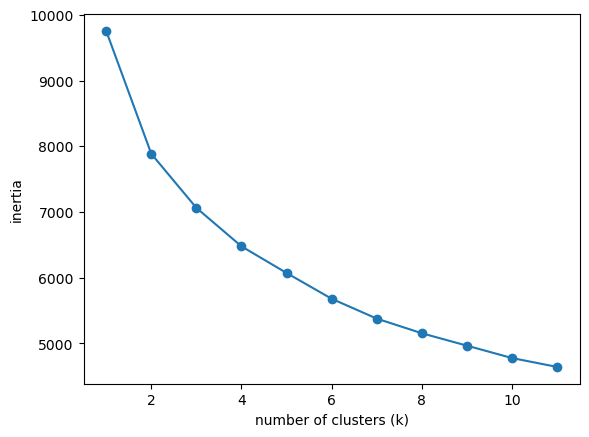

In [20]:
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

In [21]:
classifier2 = KMeans(init='k-means++', n_clusters = 3)
classifier2.fit(data)

KMeans(n_clusters=3)

In [22]:
classifier2.cluster_centers_

array([[1.78776978, 1.72661871, 0.53597122, 1.54316547, 0.50359712,
        2.70503597, 0.57194245, 1.68705036],
       [2.88737201, 2.92491468, 2.51535836, 2.55290102, 0.66211604,
        2.3447099 , 2.40273038, 2.95221843],
       [2.69715447, 2.63617886, 2.83739837, 2.25609756, 0.7195122 ,
        3.3699187 , 0.81910569, 1.86585366]])

In [23]:
classifier2.inertia_

7062.232597948683

In [24]:
classifier2.labels_

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [25]:
cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []

for i in range(len(classifier2.labels_)):
    if classifier2.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier2.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif classifier2.labels_[i] == 2:
        cluster_two_indices.append(i)

In [26]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
cluster_two_df = rows_to_cluster.iloc[cluster_two_indices]

In [27]:
print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))

College or more         0.294964
Some college            0.287770
Post graduate degree    0.269784
High school or less     0.143885
Name: educ4, dtype: float64


In [28]:
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

Post graduate degree    0.367347
College or more         0.268707
Some college            0.265306
High school or less     0.098639
Name: educ4, dtype: float64


In [29]:
print(cluster_two_df['educ4'].value_counts()/len(cluster_two_df))

College or more         0.352342
Post graduate degree    0.336049
Some college            0.236253
High school or less     0.075356
Name: educ4, dtype: float64


**Both KMeans algorithms show that respondents' answers to question 7 seem to be divided by their level of education and do not necessarily fall into 'feminine' or 'masculine' category.**

### New Data - Mr K's responses to question 7

In [30]:
Mr_K = [[4, 3, 0, 3, 2, 3, 3, 3]]

In [31]:
classifier.predict(Mr_K)

/Users/amoke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)